In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib.gridspec import GridSpec


from matplotlib import rc


In [2]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [7]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.tick_params(labelbottom=True, labelleft=True)
        
def PlotRow(FileName, XLabel, YLabel, title, axis):
    FrictionData = pd.read_csv(FileName,sep=";",header=None,names=["time", "Tau", "Slip", "SlipRate", "Fric"])
    FrictionData.plot(x=XLabel[0], y=YLabel[0], title = title, ax=axis)
    axis.set_xlabel(XLabel[1])
    axis.set_ylabel(YLabel[1])
    
def PlotRows(FileName,ListOfAxes,title):
    PlotRow(FileName, ["time","$Time$"], ["Slip","$Slip$"], title, ListOfAxes[0])
    PlotRow(FileName, ["time","$Time$"], ["SlipRate","$Slip$ $Rate$"], title, ListOfAxes[1])
    PlotRow(FileName, ["time","$Time$"], ["Fric","$\mu$"], title, ListOfAxes[2])
    PlotRow(FileName, ["Slip","$Slip$"], ["Fric","$\mu$"], title, ListOfAxes[3])


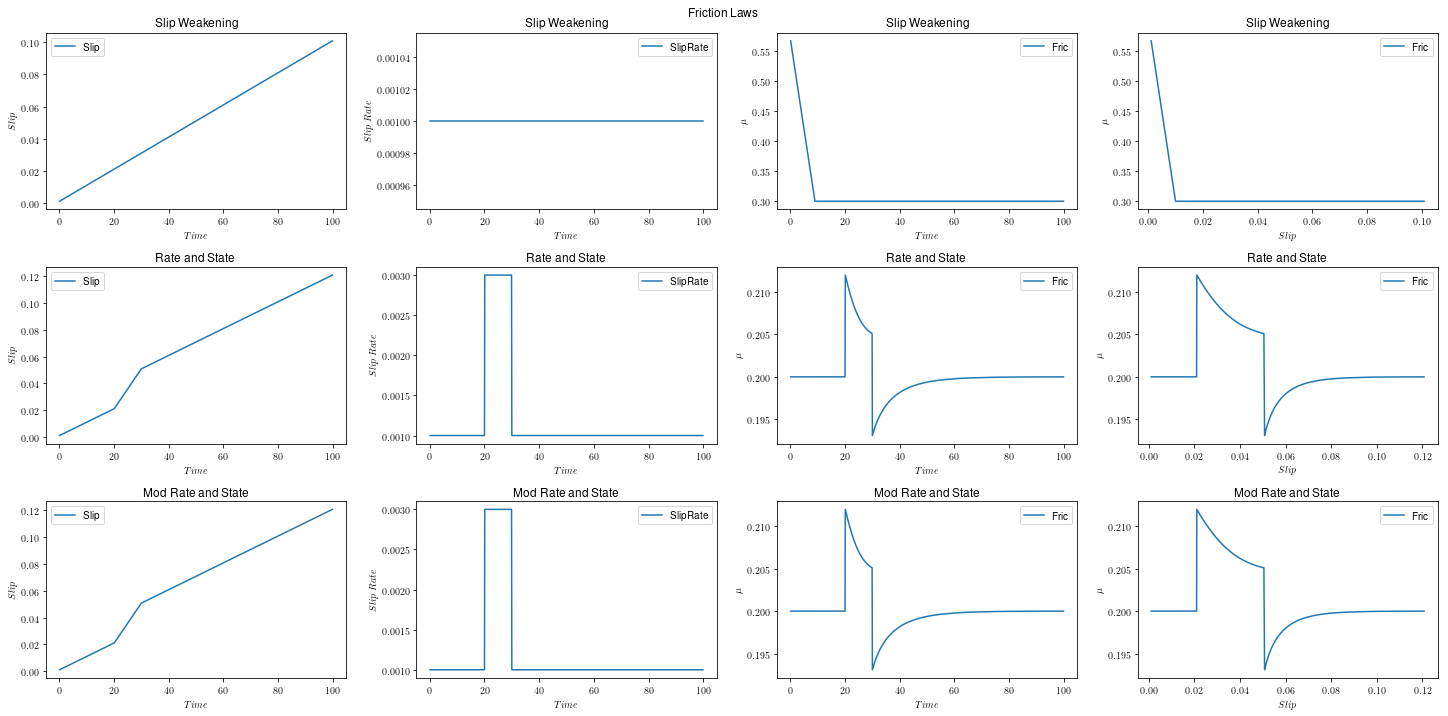

In [8]:
ListFilenames=["../Output/TestSW.txt","../Output/TestSR.txt","../Output/TestModSR.txt"]
Titles = ["Slip Weakening", "Rate and State", "Mod Rate and State"]




fig = plt.figure(constrained_layout=True, figsize=(20,10))

gs = GridSpec(3, 4, figure=fig)
for j in range(3):
    ax1 = [fig.add_subplot(gs[j, i]) for i in range(4)]
    PlotRows(ListFilenames[j],ax1,Titles[j])



fig.suptitle("Friction Laws")
format_axes(fig)

plt.show()